In [1]:
import matplotlib.pyplot as plt
import time
from mesa.batchrunner import batch_run
import pandas as pd
import numpy as np
%matplotlib inline

from model2 import SchellingModel


C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#IL MODELLO, PER COME EFFETTUA LO STEP, CONSIDERA IL NEIGH ASSOLUTO => SE UN AGENTE è SOLO (NON HA NEIGH DI NESSUN TIPO) ALLORA è CONSIDERATO COME NON SODDISFATTO

TESTARE IL NEIGH RELATIVO

Now we instantiate a model instance: a 10x10 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 30% similar neighbors.

In [15]:
#["pure_random","mild_random","min_gain","max_gain"]
#neighborhood_type = "abs"/"rel"
model = SchellingModel(10, 0.5, 0.4, 0.3, "max_gain", neighborhood_type="rel", verbose = 0, skip_if_not_happy = True)
# side =10, density=0.7, minority_pc=0.3, homophily=0.3, verbose
#minority: 0 = all blue, 1 = all red
#cell type: 1 = red, 2 = blue 

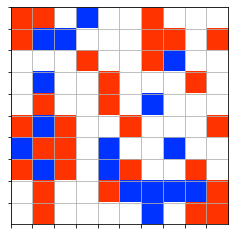

In [16]:
model.show()

In [17]:
model.schedule.get_agent_count()

46

We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will ever settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

BATCH RUNS

**FIXED SIDE-NEIGH-DENSITY-MINORITY, VARY HOMOPHILY**

In [2]:
#parameters = {"side": [8,10,12,14,16,18,20], "density": [0.2, 0.4, 0.6, 0.8], "minority_pc": [0.2, 0.4, 0.6, 0.8], 
#              "homophily": [0.2, 0.4, 0.6, 0.8], "relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
#              "neighborhood_type":["abs","rel"], "skip_if_not_happy":True}

parameters = {"side": [20], "neighborhood_type":["abs"], "density": [0.5], "homophily": [0.2,0.4,0.6,0.8], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndm_h = pd.DataFrame(results)
df_sndm_h.to_csv('df_sndm_h', index=False)

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [34:12<00:00, 128.25s/it]


In [7]:
df1 = pd.read_csv('df_sndm_h.csv')  
df1

,RunId,iteration,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,x,y,segregation
0,0,0,0,20,abs,0.5,0.2,0.4,pure_random,True,0.703349,0.276914,0.005514,0.000000,NaN,NaN,NaN,NaN
1,0,0,1,20,abs,0.5,0.2,0.4,pure_random,True,0.827751,0.363636,0.002994,0.000000,0.0,0.0,1.0,0.250
2,0,0,1,20,abs,0.5,0.2,0.4,pure_random,True,0.827751,0.363636,0.002994,0.000000,1.0,14.0,15.0,0.125
3,0,0,1,20,abs,0.5,0.2,0.4,pure_random,True,0.827751,0.363636,0.002994,0.000000,2.0,9.0,13.0,0.000
4,0,0,1,20,abs,0.5,0.2,0.4,pure_random,True,0.827751,0.363636,0.002994,0.000000,3.0,7.0,7.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467452,15,0,200,20,abs,0.5,0.8,0.4,min_gain,True,0.005102,0.260204,6.348508,1666.071335,191.0,19.0,8.0,0.250
467453,15,0,200,20,abs,0.5,0.8,0.4,min_gain,True,0.005102,0.260204,6.348508,1666.071335,192.0,19.0,10.0,0.000
467454,15,0,200,20,abs,0.5,0.8,0.4,min_gain,True,0.005102,0.260204,6.348508,1666.071335,193.0,19.0,13.0,0.000
467455,15,0,200,20,abs,0.5,0.8,0.4,min_gain,True,0.005102,0.260204,6.348508,1666.071335,194.0,19.0,14.0,0.000


**FIXED NEIGH-DENSITY-HOMOPHILY-MINORITY, VARY SIDE**

In [4]:
parameters = {"side": [10,20,30], "neighborhood_type":["abs"], "density": [0.5], "homophily": [0.6], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_ndhm_s = pd.DataFrame(results)
df_ndhm_s.to_csv('df_ndhm_s', index=False)

100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [1:34:15<00:00, 471.33s/it]


In [8]:
df2 = pd.read_csv('df_ndhm_s.csv')  
df2

,RunId,iteration,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,x,y,segregation
0,0,0,0,10,abs,0.5,0.6,0.4,pure_random,True,0.086207,0.278017,0.000000,0.000000,NaN,NaN,NaN,NaN
1,0,0,1,10,abs,0.5,0.6,0.4,pure_random,True,0.155172,0.293103,0.015018,0.000000,0.0,0.0,2.0,0.000
2,0,0,1,10,abs,0.5,0.6,0.4,pure_random,True,0.155172,0.293103,0.015018,0.000000,1.0,9.0,6.0,0.125
3,0,0,1,10,abs,0.5,0.6,0.4,pure_random,True,0.155172,0.293103,0.015018,0.000000,2.0,9.0,3.0,0.375
4,0,0,1,10,abs,0.5,0.6,0.4,pure_random,True,0.155172,0.293103,0.015018,0.000000,3.0,6.0,5.0,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561007,11,0,200,30,abs,0.5,0.6,0.4,min_gain,True,0.176471,0.320806,26.233989,5489.935821,454.0,29.0,20.0,0.250
561008,11,0,200,30,abs,0.5,0.6,0.4,min_gain,True,0.176471,0.320806,26.233989,5489.935821,455.0,29.0,22.0,0.125
561009,11,0,200,30,abs,0.5,0.6,0.4,min_gain,True,0.176471,0.320806,26.233989,5489.935821,456.0,29.0,23.0,0.125
561010,11,0,200,30,abs,0.5,0.6,0.4,min_gain,True,0.176471,0.320806,26.233989,5489.935821,457.0,29.0,25.0,0.000


**FIXED SIDE-DENSITY-HOMOPHILY-MINORITY, VARY NEIGH**

In [5]:
parameters = {"side": [20], "neighborhood_type":["abs","rel"], "density": [0.5], "homophily": [0.6], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sdhm_n = pd.DataFrame(results)
df_sdhm_n.to_csv('df_sdhm_n', index=False)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [18:18<00:00, 137.37s/it]


In [9]:
df3 = pd.read_csv('df_sdhm_n.csv')  
df3

,RunId,iteration,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,x,y,segregation
0,4,0,0,20,rel,0.5,0.6,0.4,pure_random,True,0.572727,0.605601,0.007034,0.000000,NaN,NaN,NaN,NaN
1,4,0,1,20,rel,0.5,0.6,0.4,pure_random,True,0.750000,0.725303,0.009035,0.000000,0.0,7.0,11.0,0.000
2,4,0,1,20,rel,0.5,0.6,0.4,pure_random,True,0.750000,0.725303,0.009035,0.000000,1.0,16.0,18.0,0.000
3,4,0,1,20,rel,0.5,0.6,0.4,pure_random,True,0.750000,0.725303,0.009035,0.000000,2.0,0.0,8.0,1.000
4,4,0,1,20,rel,0.5,0.6,0.4,pure_random,True,0.750000,0.725303,0.009035,0.000000,3.0,0.0,10.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168902,3,0,200,20,abs,0.5,0.6,0.4,min_gain,True,0.148515,0.298267,5.372476,1085.858788,197.0,19.0,8.0,0.125
168903,3,0,200,20,abs,0.5,0.6,0.4,min_gain,True,0.148515,0.298267,5.372476,1085.858788,198.0,19.0,11.0,0.125
168904,3,0,200,20,abs,0.5,0.6,0.4,min_gain,True,0.148515,0.298267,5.372476,1085.858788,199.0,19.0,13.0,0.000
168905,3,0,200,20,abs,0.5,0.6,0.4,min_gain,True,0.148515,0.298267,5.372476,1085.858788,200.0,19.0,15.0,0.000


**FIXED SIDE-NEIGH-HOMOPHILY-MINORITY, VARY DENSITY**

In [6]:
parameters = {"side": [20], "neighborhood_type":["abs"], "density": [0.2, 0.4,0.6,0.8], "homophily": [0.6], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_snhm_d = pd.DataFrame(results)
df_snhm_d.to_csv('df_snhm_d', index=False)

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [43:05<00:00, 161.56s/it]


In [ ]:
df4 = pd.read_csv('df_sdhm_n.csv')  
df4

**FIXED SIDE-NEIGH-DENSITY-HOMOPHILY, VARY MINORITY**

In [3]:
parameters = {"side": [20], "neighborhood_type":["abs"], "density": [0.5], "homophily": [0.4], 
              "minority_pc":[0.2,0.4,0.6,0.8],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndh_m = pd.DataFrame(results)
df_sndh_m.to_csv('df_sndh_m', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [12:06<00:00, 45.39s/it]


In [109]:
homophily_set = [0.2,0.4,0.6,0.8]
side_set = [5,10,15]
relocation_policy_set = ["pure_random","mild_random","max_gain","min_gain"]
neighborhood_type_set = ["abs","rel"]

In [8]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,side,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,x,y,segregation
0,3,0,0,5,0.2,mild_random,rel,True,0.944444,0.735185,0.007618,0.000000,NaN,NaN,NaN,NaN
1,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,0.0,0.0,0.0,0.666667
2,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,1.0,0.0,1.0,0.800000
3,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,2.0,0.0,2.0,0.800000
4,3,0,1,5,0.2,mild_random,rel,True,1.000000,0.766667,0.000000,0.007618,3.0,0.0,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710550,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,142.0,14.0,8.0,0.500000
710551,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,143.0,14.0,9.0,0.750000
710552,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,144.0,14.0,11.0,0.500000
710553,92,0,200,15,0.8,max_gain,abs,True,0.000000,0.656463,1.973053,630.355698,145.0,14.0,12.0,0.750000


In [21]:
df.to_csv('df_computed',index=False)

<AxesSubplot:>

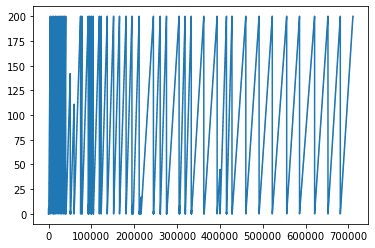

In [151]:
df.Step.plot()

<AxesSubplot:>

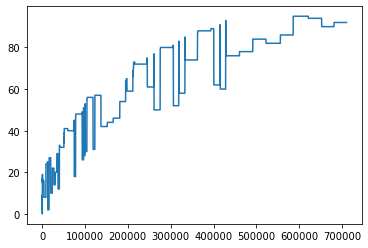

In [10]:
df.RunId.plot()

In [11]:
df2 = df.drop(['skip_if_not_happy', 'x','y','iteration'], axis=1)
df2

,RunId,Step,side,homophily,relocation_policy,neighborhood_type,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,3,0,5,0.2,mild_random,rel,0.944444,0.735185,0.007618,0.000000,NaN,NaN
1,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,0.0,0.666667
2,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,1.0,0.800000
3,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,2.0,0.800000
4,3,1,5,0.2,mild_random,rel,1.000000,0.766667,0.000000,0.007618,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
710550,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,142.0,0.500000
710551,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,143.0,0.750000
710552,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,144.0,0.500000
710553,92,200,15,0.8,max_gain,abs,0.000000,0.656463,1.973053,630.355698,145.0,0.750000


<AxesSubplot:>

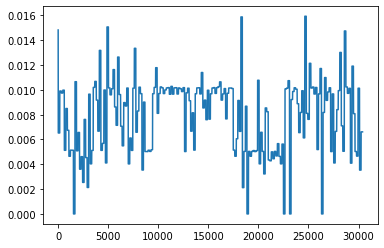

In [195]:
p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs") ]
p1 = p1[p1["relocation_policy"]=="pure_random"]
p1.reset_index(inplace=True, drop=True)
p1.elapsed_step_time.plot()

<AxesSubplot:>

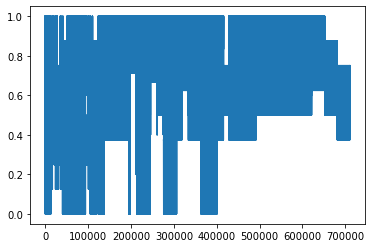

In [175]:
df2.segregation.plot()

In [102]:
p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="rel")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_step_time"]]
r

elapsed_step_time
homophily relocation_policy                   
0.2       max_gain                    0.370654
          mild_random                 0.519589
          min_gain                    0.859116
          pure_random                 0.010226
0.4       max_gain                    1.694049
          mild_random                 1.670269
          min_gain                    2.088551
          pure_random                 0.008663
0.6       max_gain                    2.155830
          mild_random                 2.588654
          min_gain                    3.604587
          pure_random                 0.010275
0.8       max_gain                    2.710554
          mild_random                 3.579922
          min_gain                    2.619697
          pure_random                 0.012151

In [142]:
p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="rel")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r

elapsed_total_time
homophily relocation_policy                    
0.2       max_gain                     0.377298
          mild_random                  0.634200
          min_gain                     1.005354
          pure_random                  0.056675
0.4       max_gain                     1.809642
          mild_random                  1.942543
          min_gain                     3.078816
          pure_random                  0.082074
0.6       max_gain                     2.790313
          mild_random                  3.172629
          min_gain                     5.111782
          pure_random                  0.049957
0.8       max_gain                     2.773155
          mild_random                  3.995011
          min_gain                   329.726755
          pure_random                  0.263252

In [133]:
r.loc[0.2].loc["max_gain"].values[0]

0.3706541061401367

[1.2851641178131104, 276.3632595539093, 507.42712211608887, 630.3556976318359]


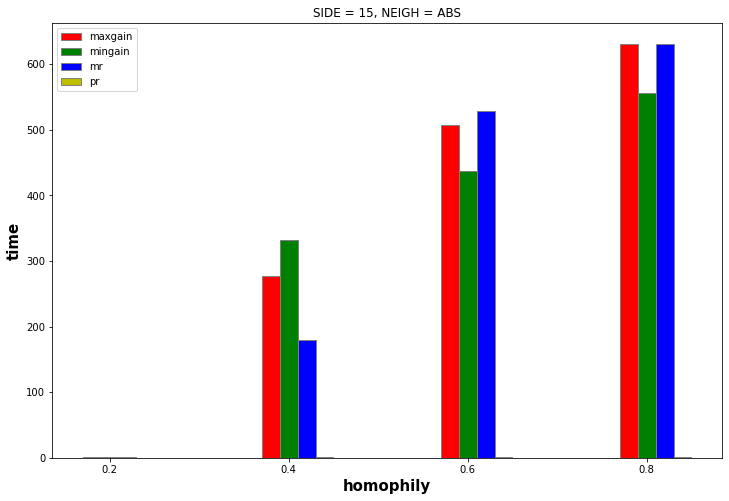

In [155]:
import numpy as np
import matplotlib.pyplot as plt

p2 = df2[(df2["side"]==15) & (df2["neighborhood_type"]=="abs")]
r = p2.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for hom in homophily_set:
    max_gain.append(r.loc[hom].loc["max_gain"].values[0])
    min_gain.append(r.loc[hom].loc["min_gain"].values[0])
    mR.append(r.loc[hom].loc["mild_random"].values[0])
    pr.append(r.loc[hom].loc["pure_random"].values[0])    

print(max_gain)

# Set position of bar on X axis
br1 = np.arange(len(homophily_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		homophily_set)

plt.title("SIDE = 15, NEIGH = ABS")
plt.legend()
plt.show()


[27.56088423728943, 329.41416907310486, 630.3556976318359]


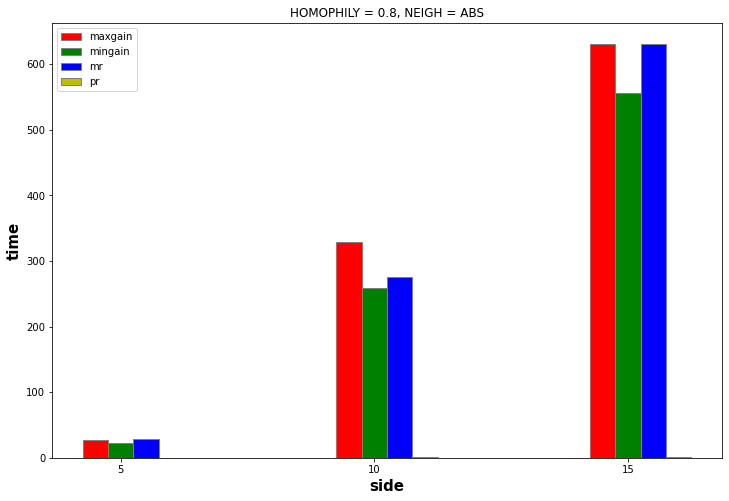

In [157]:
import numpy as np
import matplotlib.pyplot as plt

p2 = df2[(df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]
r = p2.groupby(["side","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for side in side_set:
    max_gain.append(r.loc[side].loc["max_gain"].values[0])
    min_gain.append(r.loc[side].loc["min_gain"].values[0])
    mR.append(r.loc[side].loc["mild_random"].values[0])
    pr.append(r.loc[side].loc["pure_random"].values[0])    

print(max_gain)

# Set position of bar on X axis
br1 = np.arange(len(side_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('side', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		side_set)

plt.title("HOMOPHILY = 0.8, NEIGH = ABS")
plt.legend()
plt.show()


[630.3556976318359, 2.7731552124023438]


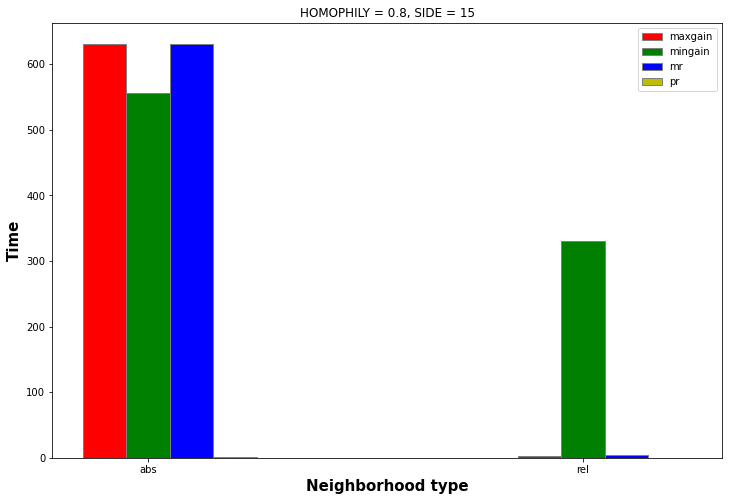

In [159]:
import numpy as np
import matplotlib.pyplot as plt

p2 = df2[(df2["homophily"]==0.8) & (df2["side"]==15)]
r = p2.groupby(["neighborhood_type","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for neighT in neighborhood_type_set:
    max_gain.append(r.loc[neighT].loc["max_gain"].values[0])
    min_gain.append(r.loc[neighT].loc["min_gain"].values[0])
    mR.append(r.loc[neighT].loc["mild_random"].values[0])
    pr.append(r.loc[neighT].loc["pure_random"].values[0])    

print(max_gain)

# Set position of bar on X axis
br1 = np.arange(len(neighborhood_type_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('Neighborhood type', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		neighborhood_type_set)

plt.title("HOMOPHILY = 0.8, SIDE = 15")
plt.legend()
plt.show()


DURING

SIDE CHANGE (HOMOPHILY FIX TO 0.8, NEIGH FIX TO ABS)

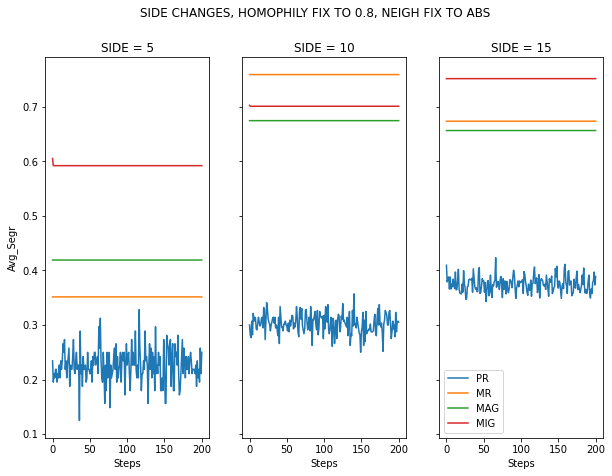

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==5) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax1.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax1.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax1.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==10) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax2.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax2.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax2.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax2.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax3.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax3.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax3.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax3.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax1.set_title('SIDE = 5')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Avg_Segr')

ax2.set_title('SIDE = 10')
ax2.set_xlabel('Steps')

ax3.set_title('SIDE = 15')
ax3.set_xlabel('Steps')

f.suptitle('SIDE CHANGES, HOMOPHILY FIX TO 0.8, NEIGH FIX TO ABS')
plt.legend()

SIDE CHANGES (HOMOPHILY FIX TO 0.8, NEIGH FIX TO REL)

HOMOPHILY CHANGE (FIX SIDE TO 15, NEIGH TO ABS)

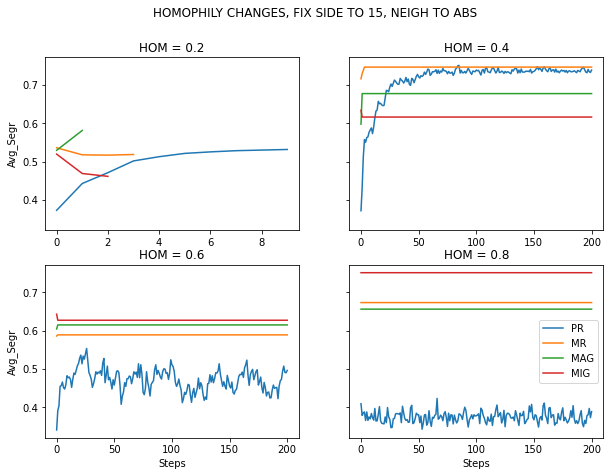

In [64]:
f, ax = plt.subplots(2, 2, figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.2) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.4) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[0,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[0,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[0,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.6) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,0].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,0].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,0].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,0].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

############################################


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1,1].plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax[1,1].plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax[1,1].plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax[1,1].plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


ax[0,0].set_title('HOM = 0.2')
ax[0,0].set_ylabel('Avg_Segr')

ax[0,1].set_title('HOM = 0.4')


ax[1,0].set_title('HOM = 0.6')
ax[1,0].set_xlabel('Steps')
ax[1,0].set_ylabel('Avg_Segr')

ax[1,1].set_title('HOM = 0.8')
ax[1,1].set_xlabel('Steps')

f.suptitle('HOMOPHILY CHANGES, FIX SIDE TO 15, NEIGH TO ABS')
plt.legend()

In [ ]:
NEIGH CHANGE (FIX SIDE TO 15, HOMO TO 0.8)

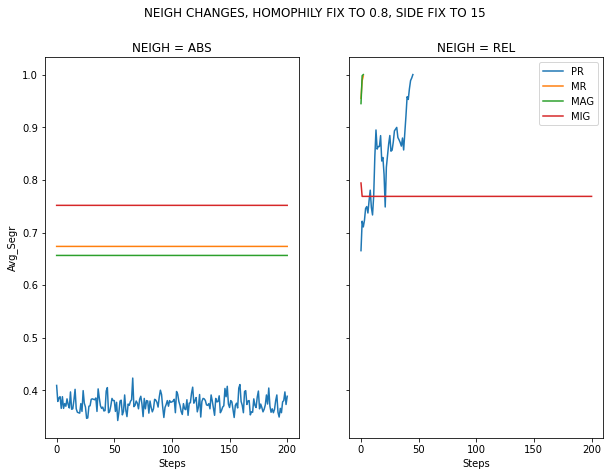

In [191]:
f, (ax1, ax2) = plt.subplots(1, , figsize=(10, 7), sharey = True)


p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="abs")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax1.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax1.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax1.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')

###############################àà

p1 = df2[(df2["side"]==15) & (df2["homophily"]==0.8) & (df2["neighborhood_type"]=="rel")]

pPR = p1[p1["relocation_policy"]=="pure_random"]
pMR = p1[p1["relocation_policy"]=="mild_random"]
pMAG = p1[p1["relocation_policy"]=="max_gain"]
pMIG = p1[p1["relocation_policy"]=="min_gain"]

ax2.plot(pPR["Step"], pPR["tot_seg"],  label='PR')
ax2.plot(pMR["Step"], pMR["tot_seg"],  label='MR')
ax2.plot(pMAG["Step"], pMAG["tot_seg"],  label='MAG')
ax2.plot(pMIG["Step"], pMIG["tot_seg"],  label='MIG')


################################################


ax1.set_title('NEIGH = ABS')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Avg_Segr')

ax2.set_title('NEIGH = REL')
ax2.set_xlabel('Steps')


f.suptitle('NEIGH CHANGES, HOMOPHILY FIX TO 0.8, SIDE FIX TO 15')
plt.legend()

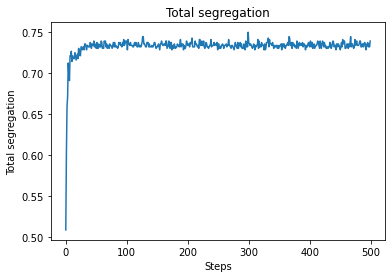

In [70]:
model_vars.tot_seg.plot()

plt.title("Total segregation")
plt.xlabel("Steps")
plt.ylabel("Total segregation")
plt.show()

For testing purposes, here is a table giving each agent's x and y values at each step.

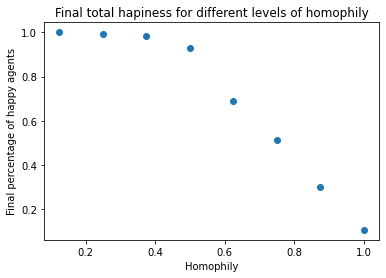

In [19]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["perc_happy"]]
mean_happy = hom_iter.groupby("homophily").mean()["perc_happy"]

plt.scatter(np.arange(1/8,9/8,1/8),mean_happy)

plt.title("Final total hapiness for different levels of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final percentage of happy agents")
plt.show()

We can look at no. of steps

In [20]:
df.groupby(["homophily"]).max()[["Step"]]

,Step
homophily,
0.125,6
0.250,500
0.375,500
0.500,500
0.625,500
0.750,500
0.875,500
1.000,500


We plot the mean (on 10 interations) of final segregation for evert homophily level

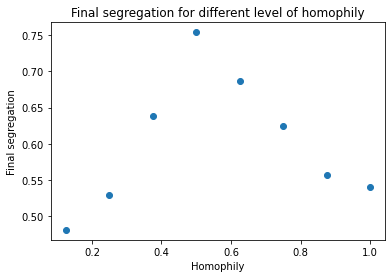

In [21]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["tot_seg"]]
tot_seg = hom_iter.groupby("homophily").mean()["tot_seg"]

plt.scatter(np.arange(1/8,9/8,1/8),tot_seg)


plt.title("Final segregation for different level of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final segregation")
plt.show()

We now have a look to segregation over steps for the highest level of homophily

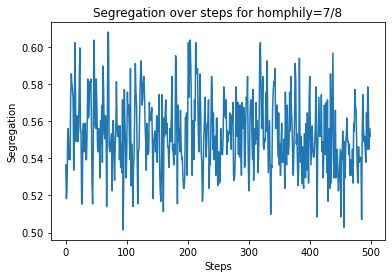

In [23]:
plt.plot(df[(df["AgentID"]==1) & (df["homophily"]==7/8) & (df["iteration"]==0)].reset_index()["tot_seg"])

plt.title("Segregation over steps for homphily=7/8")
plt.xlabel("Steps")
plt.ylabel("Segregation")
plt.show()

Now, we can do a parameter sweep to see how segregation changes with minority_pc

In [24]:
parameters = {"side": 10, "density": 0.8, "minority_pc": [.1,.2, .3,.4, .5], 
              "homophily": 0.3}

results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.22it/s]


In [25]:
df = pd.DataFrame(results)

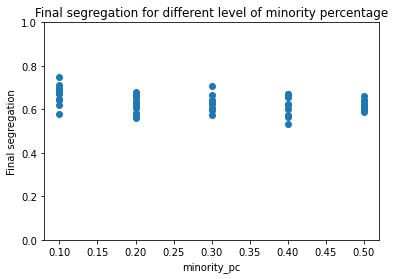

In [26]:
min_iter = df.groupby(["minority_pc","iteration"]).max()[["tot_seg"]]
min_iter
plt.scatter(np.repeat([.1,.2,.3,.4,.5],10),min_iter)


plt.title("Final segregation for different level of minority percentage")
plt.xlabel("minority_pc")
plt.ylabel("Final segregation")
plt.ylim(0, 1)

plt.show()

In [27]:
df.groupby(["minority_pc"]).max()[["Step"]]

,Step
minority_pc,
0.1,500
0.2,500
0.3,500
0.4,500
0.5,500


In [29]:
df.head()

,RunId,iteration,Step,side,density,minority_pc,homophily,perc_happy,tot_seg,AgentID,x,y,segregation
0,0,0,0,10,0.8,0.1,0.3,0.915663,0.671687,NaN,NaN,NaN,NaN
1,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,0.0,9.0,1.0,0.250
2,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,1.0,0.0,1.0,0.500
3,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,2.0,0.0,2.0,0.625
4,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,3.0,0.0,3.0,0.500


In [9]:
import pandas as pd
import numpy as np
d = pd.DataFrame(0, index=np.arange(10), columns=['x','y','happiness'])
d

,x,y,happiness
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [10]:
d.loc[(d["x"] == 0) & (d["y"] == 0), "happiness"] = 52
d

,x,y,happiness
0,0,0,52
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [11]:
d.iloc[0]['happiness'] = 1
d

,x,y,happiness
0,0,0,1
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [12]:
d.sort_values(by="happiness", inplace = True, ascending = False)
d.reset_index(inplace = True)
d

,index,x,y,happiness
0,1,0,0,52
1,2,0,0,52
2,3,0,0,52
3,4,0,0,52
4,5,0,0,52
5,6,0,0,52
6,7,0,0,52
7,8,0,0,52
8,9,0,0,52
9,0,0,0,1


In [13]:
d_happy = d[d["happiness"]>53]
d_happy.reset_index(inplace=True)
d_happy

,level_0,index,x,y,happiness


In [18]:
d_happy.empty

True